In [44]:
import sys
import scipy
import numpy
import matplotlib.pyplot as plt
import pandas 
import sklearn
import seaborn as sns


In [7]:
dataset=pandas.read_csv("iris.csv")

In [7]:
print(dataset.shape)

(150, 6)


In [8]:
print(dataset.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [12]:
print(dataset.head(15))

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2

In [13]:
print(dataset.tail(15))


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
135  136            7.7           3.0            6.1           2.3   
136  137            6.3           3.4            5.6           2.4   
137  138            6.4           3.1            5.5           1.8   
138  139            6.0           3.0            4.8           1.8   
139  140            6.9           3.1            5.4           2.1   
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            

In [9]:
dataset['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

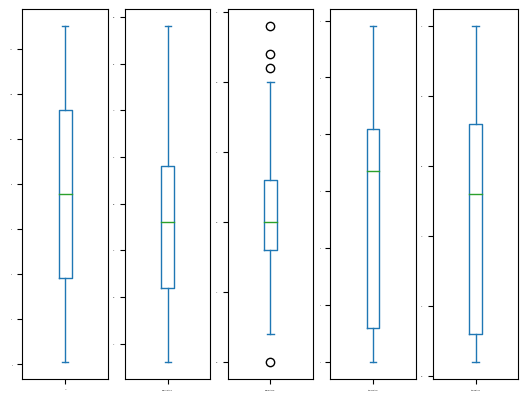

In [27]:
dataset.plot(kind='box', subplots = True,  sharex = False, sharey = False, fontsize=1)
plt.show()

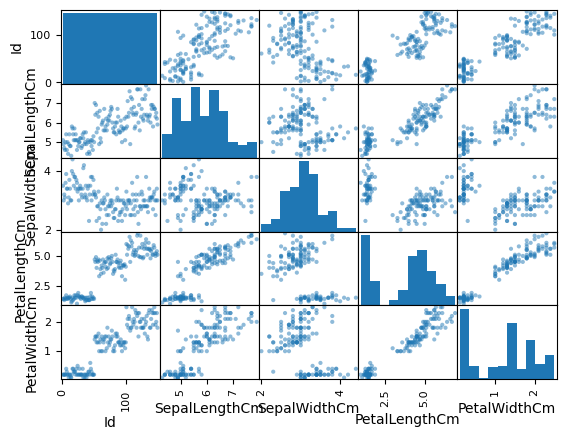

In [28]:
scatter_matrix(dataset)
plt.show()

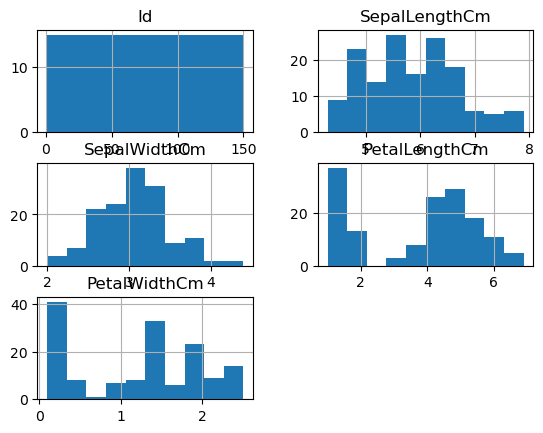

In [29]:
dataset.hist()
plt.show()

<AxesSubplot:>

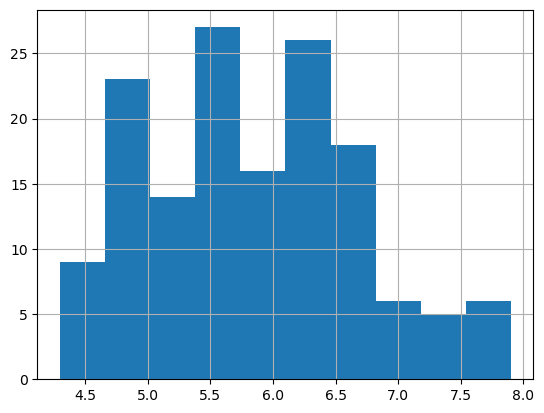

In [11]:
dataset['SepalLengthCm'].hist()

<AxesSubplot:>

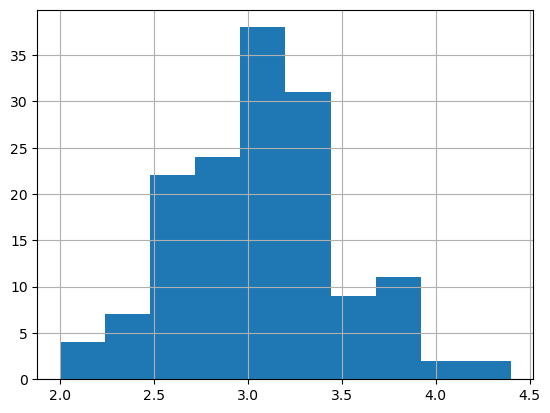

In [12]:
dataset['SepalWidthCm'].hist()

<AxesSubplot:>

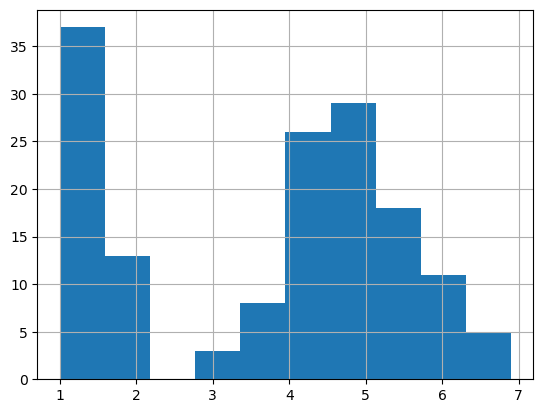

In [13]:
dataset['PetalLengthCm'].hist()

<AxesSubplot:>

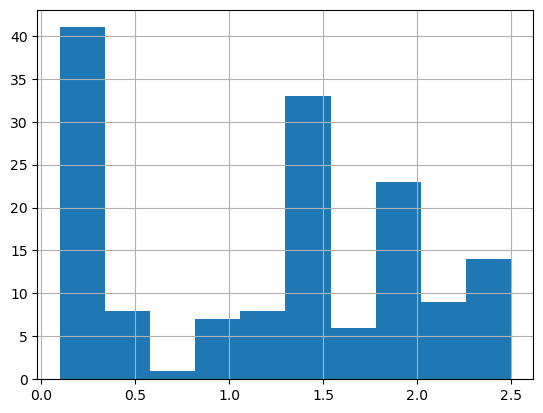

In [14]:
dataset['PetalWidthCm'].hist()

In [15]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

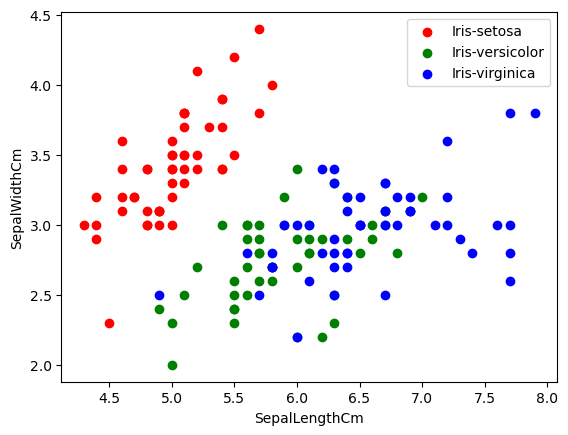

In [49]:
colors=['red','green','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=dataset[dataset['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm") 
plt.legend()

In [39]:
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

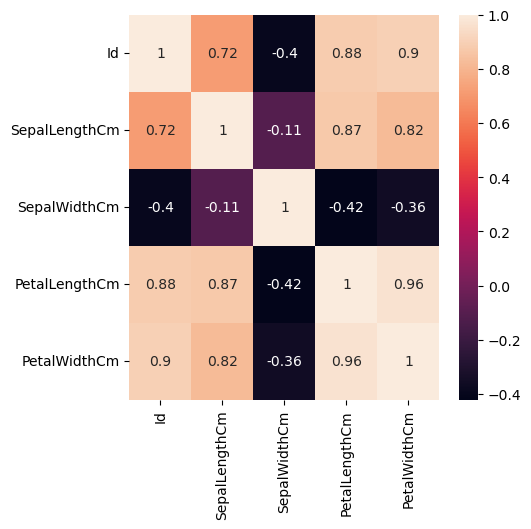

In [46]:
corr=dataset.corr()
fig,ax= plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [75]:
from sklearn.model_selection import train_test_split
X=dataset.drop(columns=['Species'])
Y=dataset['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.30)

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [77]:
model.fit(x_train,y_train)

C:\Users\SAPNA SINGH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
print("Accuracy:" ,model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [79]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [80]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
print("Accuracy:" ,model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


C:\Users\SAPNA SINGH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [82]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [83]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
print("Accuracy:" ,model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777
